In [1]:
from numpy.random import seed
import numpy as np
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

import tensorflow as tf
# from tensorflow.python.keras.optimizers import Fire
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras import backend as K
from tensorflow.python.keras import optimizers

from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import log_loss

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable


import matplotlib.pyplot as plt
%matplotlib inline

## Preparing the input data


In [2]:
#Preparing the input data

#loading the MNIST dataset
mnist = tf.keras.datasets.mnist

#Separating into train and test (60000 train, 10000 test)
(x_train, y_train0),(x_test, y_test0) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#flattening the images (from 28x28 to 784)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

#converting the otputs (labels) into one hot vectors
lb = preprocessing.LabelBinarizer()
lb.fit(np.array([0,1,2,3,4,5,6,7,8,9]))
y_train = lb.transform(y_train0)
y_test = lb.transform(y_test0)

## Defining the input parameters


In [3]:
#Defining the input parameters
BatchSize         = 500
NeuronsLayer1     = 100
NeuronsLayer2     = 100
Epochs            = 100

## Model in tensorflow/Keras


In [4]:
# Defining the net

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(NeuronsLayer1,
                        activation=tf.nn.relu),
  tf.keras.layers.Dense(NeuronsLayer2, 
                        activation=tf.nn.relu),
  #  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, 
                        activation=tf.nn.softmax)
                                   ])
print(model)

In [5]:
# Construct our model, # Construct our loss function and an Optimizer. 

loss = tf.keras.backend.categorical_crossentropy
optimizer = optimizers.Adam()

model.compile(optimizer= optimizer,
              loss=loss ) #'categorical_crossentropy')

In [6]:
#train the network

HistoryKeras = model.fit(  x_train, y_train, 
            epochs=Epochs,
            batch_size=BatchSize)


Epoch 1/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.5677
Epoch 2/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.2097
Epoch 3/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.1559
Epoch 4/100
60000/60000 [==============================] - 2s 36us/step - loss: 0.1241
Epoch 5/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.1023
Epoch 6/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.0855
Epoch 7/100
60000/60000 [==============================] - 2s 31us/step - loss: 0.0742
Epoch 8/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0654
Epoch 9/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.0577
Epoch 10/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0505
Epoch 11/100
60000/60000 [==============================] - 2s 28us/step - loss: 0.0455
Epoch 12/100
60000/60000 [===============

In [7]:
#Predicting

#model.evaluate(x_test, y_test)
y_train_hat_keras = model.predict_proba(x_train)

log_loss(y_train, y_train_hat_keras)

1.905785308988257e-05

In [8]:
print(y_train[0])
print(y_train[1])

[0 0 0 0 0 1 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0]


In [9]:
print(y_train_hat_keras[0])
print(y_train_hat_keras[1])

[1.59248151e-30 4.10511780e-31 9.87905524e-29 3.78195153e-07
 0.00000000e+00 9.99999642e-01 7.33457418e-37 1.08409536e-29
 9.69164618e-27 3.67397989e-25]
[1.0000000e+00 4.4683167e-25 1.6138398e-12 9.3892560e-24 4.4029505e-34
 1.3528748e-28 1.5309506e-21 4.4388996e-29 7.0907248e-27 1.9980291e-23]


In [10]:
#Show aprameters of the network

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  78500     
_________________________________________________________________
dense_1 (Dense)              multiple                  10100     
_________________________________________________________________
dense_2 (Dense)              multiple                  1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


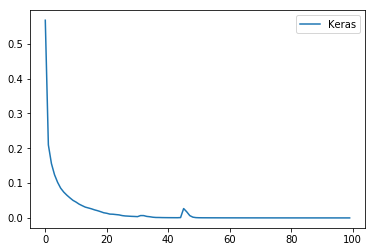

In [11]:
fig, ax = plt.subplots(1,1)
ax.plot(model.history.history['loss'], label="Keras")
ax.legend()

